In [13]:
import numpy as np
from EarthProfile import *
import matplotlib.pyplot as plt

In [15]:

irho_c, irho_m, mean_rho_core, mean_rho_mantle = get_irho()
K_core,K_mantle,q,ER,n2rho_core,n2rho_mantle,ne2rho_core,ne2rho_mantle = get_K()

<rho_core>   = 1.11e-02 (kg/cm^3)
<rho_mantle> = 4.48e-03 (kg/cm^3)
ne / rho_core   = 2.77e+26 (1/kg)
ne / rho_mantle = 2.97e+26 (1/kg)


In [ ]:
lm = np.linspace(rCore,rEarth,100)
plt.plot(lm,irho_m(lm)*mass_dict['O'][3]/(mass_dict['O'][0]*GeV2kg) ,label='O')
plt.plot(lm,irho_m(lm)*mass_dict['Mg'][3]/(mass_dict['Mg'][0]*GeV2kg),label='Mg' )
plt.plot(lm,irho_m(lm)*mass_dict['Si'][3]/(mass_dict['Si'][0]*GeV2kg),label='Si' )
plt.legend()

In [ ]:
lc = np.linspace(0,rCore,100)
plt.plot(lc,irho_c(lc)*mass_dict['Fe'][2]/(mass_dict['Fe'][0]*GeV2kg) ,label='Fe')
plt.plot(lc,irho_c(lc)*mass_dict['Si'][3]/(mass_dict['Si'][0]*GeV2kg),label='Si' )
plt.plot(lc,irho_c(lc)*mass_dict['Ni'][3]/(mass_dict['Ni'][0]*GeV2kg),label='Ni' )
plt.legend()

# Test Sampling

In [7]:
from realES import *
import matplotlib.pyplot as plt
import scipy.interpolate
import io


#5e7,1e-28,0.02,10
input_vals = ('5e7,1e-28,0.02,10').split(',')

mdm = float(input_vals[0])
sige = float(input_vals[1])
rawN = 2**25
N = int(input_vals[3])
v0 = float(input_vals[2])
r_init = 6371.

def init_sample(N,r):
    stheta = np.random.rand(N)*2*np.pi
    sr2 = np.random.rand(N)*r**2
    sr = np.sqrt(sr2)
    sx = sr*np.cos(stheta)
    sy = sr*np.sin(stheta)
    sz = -np.sqrt(r**2 - sx**2 - sy**2)
    return sx,sy,sz

sx,sy,sz = init_sample(N,r_init-1e-3)




s = EarthEvents(mdm,sige)
s.load_Ktot()
s.calc_sum_ndsig2rho_v2dlnEdlnq()
s.cut_ndsigv2()
s.inSIG2rhos()


ne / rho_core   = 2.77e+26 (1/kg)
ne / rho_mantle = 2.97e+26 (1/kg)
<rho_core>   = 1.11e-02 (kg/cm^3)
<rho_mantle> = 4.48e-03 (kg/cm^3)
| <ne> * sige (core)                 = 3.06e-04 (1/cm)|
| <ne> * sige (mantle)               = 1.33e-04 (1/cm)|
| Calculating \int\sig_{ion} ...
| (v=1e-1) \sum <ni*sigi> (core)     = 2.98e-04 (1/cm)|
| (v=1e-1) \sum <ni*sigi> (mantle)   = 1.32e-04 (1/cm)|


In [8]:
s.direct_sample()

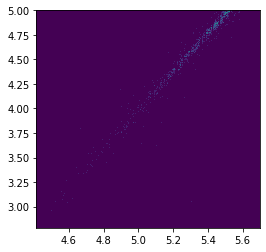

In [9]:
plt.figure(figsize=(4,4))
plt.hist2d(np.log10(s.q_sample_mantle), np.log10(s.ER_sample_mantle),bins=500);


# Velocity

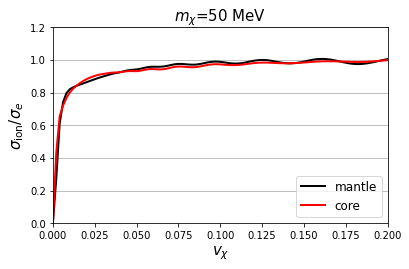

In [38]:
v = np.linspace(1e-20,0.2,100)
plt.gcf().subplots_adjust(bottom=0.2)
plt.plot(v,s.insig2rho_mantle(v)/ne2rho_mantle/1e-28,label='mantle',color='k',lw=2)
plt.plot(v,s.insig2rho_core(v)/ne2rho_core/1e-28,label='core',color='r',lw=2)
plt.xlabel('$v_\chi$',size=15)
plt.title('$m_\chi$=%.0f MeV'%(s.mdm/1e6),size=15)
plt.ylabel(r'$\sigma_{\rm ion}/\sigma_e$',size=15)
plt.legend(fontsize=12,loc=4)
plt.grid(axis='y')
plt.ylim(0,1.2)
plt.xlim(0,0.2)
plt.savefig('Sigma.pdf')

# check h5py

In [ ]:
import h5py


In [ ]:
f = h5py.File('EarthAtomicResponse/Al_Ktot.hdf5','r')
ER,q = np.meshgrid( f['ER'],f['q'],indexing='ij' )
plt.figure(figsize=(4,4))
plt.contourf(ER,q,f['Ktot'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('ER')
plt.ylabel('q')
f.close()